In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py
import tweepy

In [6]:
import re
import nltk
nltk.download("stopwords")
nltk.download('punkt')
from nltk import word_tokenize,sent_tokenize
nltk.download('wordnet')
import nltk as nlp

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
df = pd.read_csv('auspol2019.csv')
df.head()

,created_at,id,full_text,retweet_count,favorite_count,user_id,user_name,user_screen_name,user_description,user_location,user_created_at
0,2019-05-20 09:13:44,1130401208756187136,After the climate election: shellshocked green...,0.0,0.0,9.248486e+07,PIPELINEPETE,jocksjig,Retired Tradesman and Progressive Anti Conserv...,"Brisbane, Queensland",2009-11-25 09:19:45
1,2019-05-20 09:13:43,1130401205367140357,@narendramodi @smritiirani Coverage of indian ...,0.0,0.0,7.756474e+08,Narinder Parmar,nparmar1957,"Life coach & trainer, Motivational speaker, Ma...","Wollongong, NSW, AUSTRALIA",2012-08-23 10:20:40
2,2019-05-20 09:13:33,1130401162782371841,@workmanalice Do you know if Facebook is relea...,0.0,0.0,5.687300e+04,Peter Wells,peterwells,Writes for @theage and @smh on technology and ...,Melbourne,2006-12-11 07:38:06
3,2019-05-20 09:13:29,1130401143551434753,@vanbadham We all understand we have a compuls...,0.0,0.0,9.081660e+17,The Realist,therealist822,"Calls it as I see it. Anti PC, SJW and VS. If ...",NaN,2017-09-14 03:10:30
4,2019-05-20 09:13:23,1130401118666809345,"Shares were mixed in Asia, with India and Aust...",0.0,0.0,5.260074e+08,Inquirer Business,InquirerBiz,The official Twitter account of the Inquirer G...,Philippines,2012-03-16 03:51:59


In [9]:
import nltk

nltk.download('omw-1.4')

# Rest of your code...


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...


True

In [10]:
cult_list=[]

for cult in df.full_text:
    cult=re.sub("[^a-zA-z]"," ",cult)
    cult=cult.lower()
    cult=nltk.word_tokenize(cult)
    lemma=nlp.WordNetLemmatizer()
    cult=[lemma.lemmatize(word) for word in cult]
    cult=" ".join(cult)
    cult_list.append(cult)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

max_features=800
count_vectorizer=CountVectorizer(max_features=max_features,stop_words="english")
sparce_matrix=count_vectorizer.fit_transform(cult_list).toarray()

In [12]:
sparce_matrix.shape 

(183379, 800)

In [13]:
sparce_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0]], dtype=int64)

In [14]:
print("Top {} the most used words: {}".format(max_features,count_vectorizer.get_feature_names()))

Top 800 the most used words: ['abbott', 'abc', 'abcnews', 'able', 'absolutely', 'according', 'account', 'accused', 'act', 'action', 'actual', 'actually', 'ad', 'adani', 'advertising', 'aec', 'afford', 'age', 'agenda', 'ago', 'agree', 'ahead', 'alanjones', 'albo', 'albomp', 'allowed', 'alp', 'amazing', 'amp', 'analysis', 'annabelcrabb', 'anning', 'answer', 'anti', 'antony', 'antonygreenabc', 'apparently', 'aren', 'article', 'ask', 'asked', 'asking', 'attack', 'au', 'auselectoralcom', 'auspoi', 'auspol', 'aussie', 'australia', 'australiadecides', 'australian', 'australianlabor', 'australiapm', 'australiavotes', 'ausvote', 'ausvotes', 'away', 'bad', 'ballot', 'bank', 'barnaby', 'barnaby_joyce', 'barriecassidy', 'based', 'bbc', 'belief', 'believe', 'benefit', 'best', 'bet', 'better', 'big', 'biggest', 'billion', 'billshorten', 'billshortenmp', 'bit', 'blame', 'bloody', 'bob', 'bobhawke', 'booth', 'bowenchris', 'box', 'boy', 'break', 'breaking', 'brexit', 'bring', 'budget', 'bullshit', 'bus

C:\Users\moham\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [15]:
data = pd.DataFrame(count_vectorizer.get_feature_names(),columns=["Words"])
data[0:10]

,Words
0,abbott
1,abc
2,abcnews
3,able
4,absolutely
5,according
6,account
7,accused
8,act
9,action


In [18]:
!pip install wordcloud

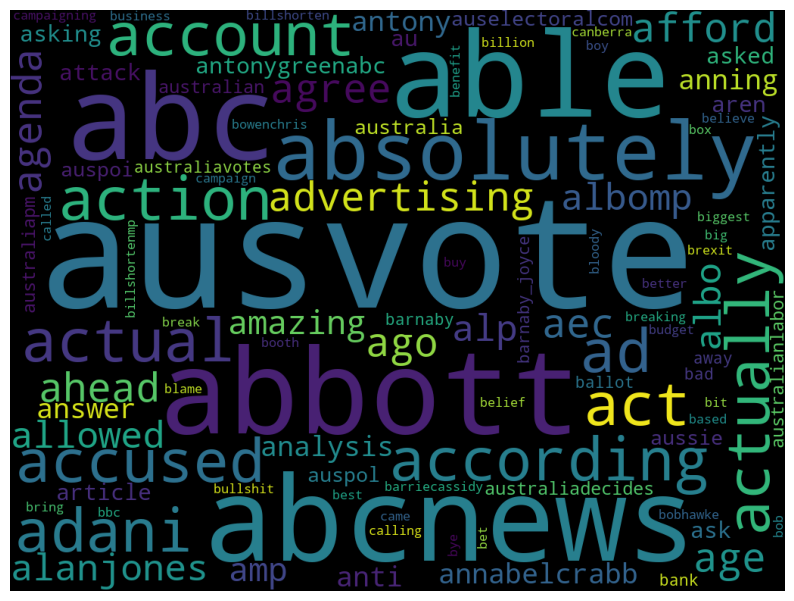

In [19]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

plt.subplots(figsize=(10,10))
wordcloud=WordCloud(background_color="black",width=1024,height=768).generate(" ".join(data.Words[0:100]))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [20]:
X=sparce_matrix[0:20000]
y0=df.favorite_count[0:20000]

y1=[]
for item in y0:
    y1+=[int(np.log1p(item))]
y=pd.Series(y1)

print(X.shape)
print(y.shape)

(20000, 800)
(20000,)


In [21]:
X[0]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [22]:
print(y.value_counts())

0    14444
1     3304
2     1233
3      591
4      244
5      109
6       50
7       12
8        9
9        4
dtype: int64


In [24]:
!pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 5.0 MB/s eta 0:00:00


In [25]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,log_loss,precision_score
from sklearn.metrics import roc_auc_score,roc_curve

from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings("ignore")

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16000, 800)
(4000, 800)
(16000,)
(4000,)


In [27]:
lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train,y_train)
y_pred = lgbm_model.predict(X_test)

In [28]:
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.7115


In [29]:
df1=df[['favorite_count','full_text']].copy()
df1

,favorite_count,full_text
0,0.0,After the climate election: shellshocked green...
1,0.0,@narendramodi @smritiirani Coverage of indian ...
2,0.0,@workmanalice Do you know if Facebook is relea...
3,0.0,@vanbadham We all understand we have a compuls...
4,0.0,"Shares were mixed in Asia, with India and Aust..."
...,...,...
183374,0.0,#australiavotes; The BANKS are taking your mon...
183375,0.0,Vote casted.... So no democracy sausage for ea...
183376,0.0,SINCERITY IS A #WINNING #SALES CHARACTERISTIC-...
183377,0.0,These arrived. No sign of a democracy sausage ...


In [30]:
df2=df1.sort_values(by=['favorite_count'],ascending=False).reset_index()
df2

,index,favorite_count,full_text
0,9202,15559.0,"Shocking defeat for Left in Australia, stunned..."
1,21815,12995.0,Bob Hawke was the greatest peacetime leader Au...
2,4727,11878.0,"In all the election commentary last night, not..."
3,10720,9377.0,"In Australia, conservatives have won another e..."
4,10963,8964.0,I HAVE GREAT NEWS: \n\nIn a stunning upset ele...
...,...,...,...
183374,120464,NaN,2009-01-30 10:16:12
183375,120508,NaN,2009-01-30 10:16:12
183376,125104,NaN,2009-01-30 10:16:12
183377,132389,NaN,2009-01-30 10:16:12


In [31]:
for i in range(8):
    print('['+str(i+1)+'] '+df2['full_text'][i])

[1] Shocking defeat for Left in Australia, stunned pollsters and mainstream media who had predicted this election as 'unlosable for Labor'. Conservative @ScottMorrisonMP focused on 'Australian First', Jobs and Imigration, while Labor focused on #ClimateChange https://t.co/hFt7vgwuEd
[2] Bob Hawke was the greatest peacetime leader Australia has ever had.

As a teenager Bob inspired me, as a PM he guided me.

I will miss him. I wish so very much that Bob had been able to see one more election day.

My condolences to Blanche, his children and grandchildren. https://t.co/4wPHdIeBUZ
[3] In all the election commentary last night, not a single word on the elephant in the room:  Murdoch, with 70% control of Australia’s print media,ran the single  most biased campaign in Australian political history. Reason for the  silence? People are in fear of Murdoch’s power.
[4] In Australia, conservatives have won another electoral victory in spite of the polls. Their election is being compared to Brexit 